## Configuração do Notebook

In [ ]:
%matplotlib inline

import logging, io, json, warnings

def print_json(o):
    print(json.dumps(o, indent=2))

import sys
python = sys.executable

!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy]===0.12.3;
!{python} -m spacy download en_core_web_md
!{python} -m spacy link en_core_web_md en --force;

!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz
!{python} -m pip install pygraphviz;

!pip install keras==2.2.4

%cd /content/drive/My Drive/Turing/NLU

## NLU - Natural Language Understanding


É um campo de NLP que visa transformar texto em forma livre em dados estruturados.

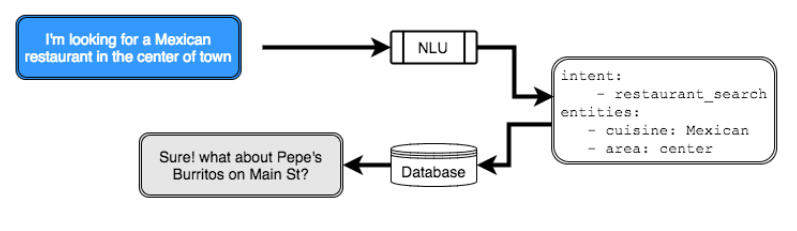

Nesse exemplo o modelo de NLU traduz a frase em dois principais tópicos: A intenção e as principais entidades do texto. 

- Intenção:
 - Encontrar um restaurante
- Entidades:
    - Culinária mexicana
    - Região central

Após identificar esses tópicos o modelo tem informações suficientes executar uma ação Ex: consultar um banco de dados, realizar uma chamada de uma api.

### Intenção

Uma intenção pode ser descrita de diversas formas, retornando no exemplo anterior: há mais de uma maneira de expressar a busca por um restaurante.

- Estou com fome
- Mostre-me boas pizzarias
- Quero levar minha namorada no sushi

O problema de identificar uma intenção em uma frase é tarefa de classificação, ou seja, dada uma frase "Qual é intenção do usuário?". No contexto de chat bots as intenções tem um escopo mais fechado, então é fácil de definir-las.

#### Exemplo 
*Quando será o próximos PS do Grupo Turing?* <br/>
- Intenção: informação_processo_seletivo


### Entidades

São entidades que representam o que o usuário fala para auxiliar na buscar.

> Reserve uma mesa para 10 de Junho, em um restaurante Chines de São Paulo.

Para identificar a principais entidades de um texto podemos utilizar algoritmos de NER (Named Entity Recognition), que visam encontrar entidades como cidades, dinheiro, data.

Para encontrar entidades identificar entidades podemos utilizar os modelos pre treiandos do spacy

#### Exemplos
*Sábado haverá evento no Instagram do Grupo Turing?*
- Intenção: informação_eventos
- Entidades: 
 - Data: Sábado
 - Rede Social: Instagram

*Estou indo da poli para o Inova*
- Intenção: movimentação
- Entidade
 - Origem: Poli
 - Destino: Inova


## RASA NLU

Lib de compreensão de linguagem natural, construída em cima da spacy, sklearn e keras, é feita para suportar tarefas específicas de chatbots. Através dela podemos treinar modelos que compreensão de texto.

Ela aceita os seguintes tipos de arquivos para treinamento: json, md, yml.

#### Intenção

Para o reconhecimento de intenção a lib utiliza word vector e o SVC (sklearn)

#### Entidades

Ela utiliza o reconhecimento de entidades do spacy

## Treinando modelo

O Rasa NLU aceita datasets em markdown (achei muuito esquisito)

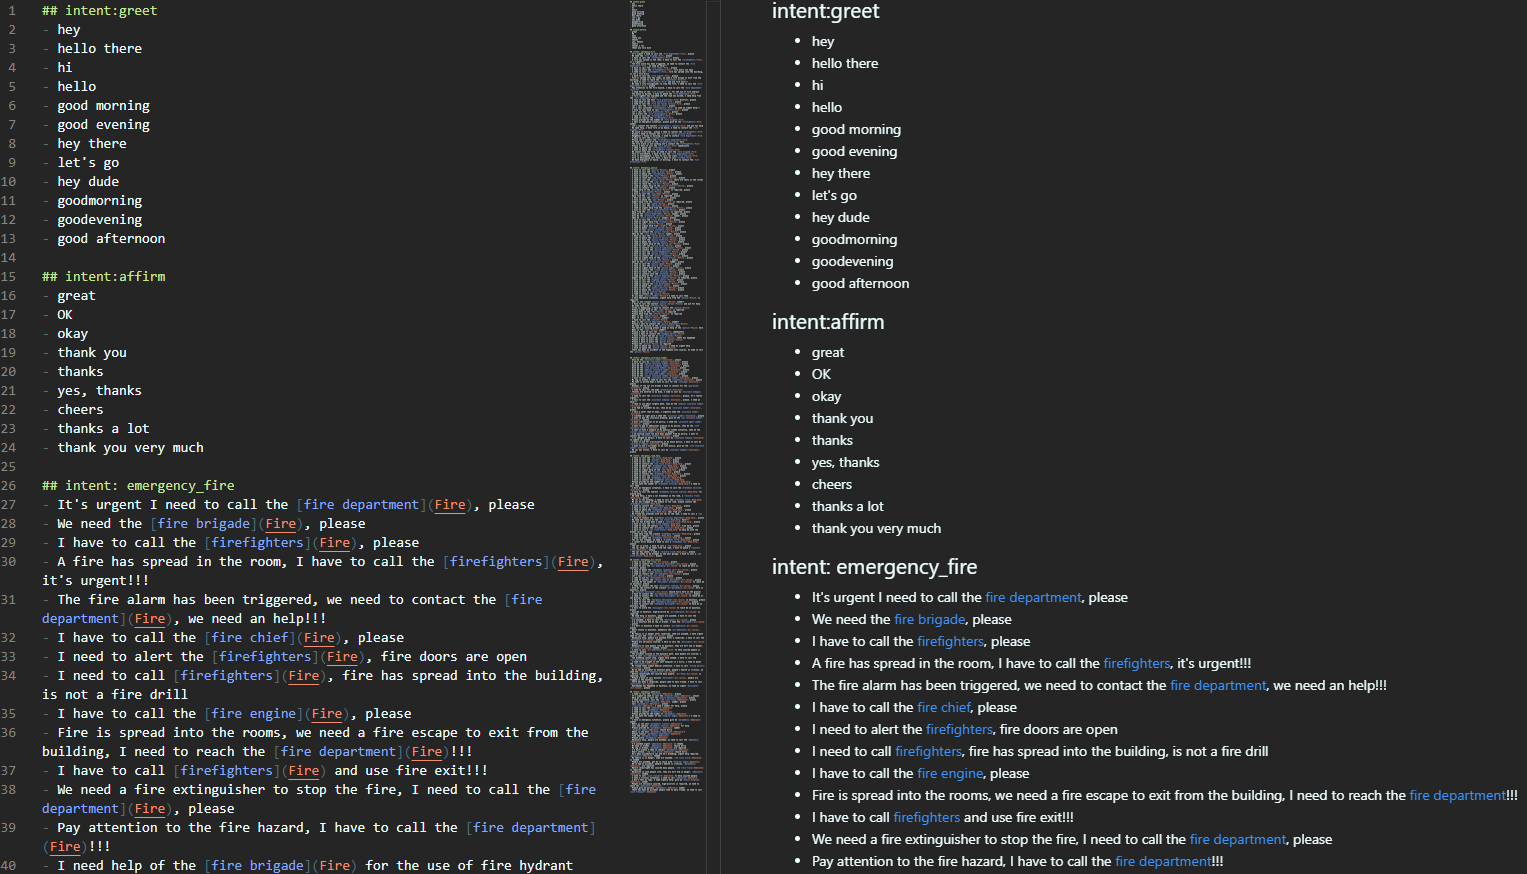

E para especificar os paraemtros do modelo podemos passar um arquivo yml, que especifica o pipeline do spcy que utilizaremos

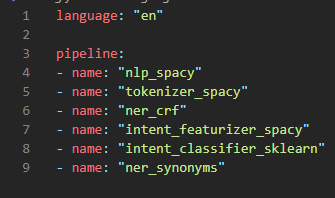

## Carregando Dataset

In [14]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# Carregando dataset
training_data = load_data("nlu.md")

# Atributos do objeto de dataset do Rasa NLU
dir(training_data)

['MIN_EXAMPLES_PER_ENTITY',
 'MIN_EXAMPLES_PER_INTENT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_lazy_entities',
 '_lazy_entity_examples',
 '_lazy_examples_per_entity',
 '_lazy_examples_per_intent',
 '_lazy_intent_examples',
 '_lazy_intents',
 'as_json',
 'as_markdown',
 'entities',
 'entity_examples',
 'entity_synonyms',
 'examples_per_entity',
 'examples_per_intent',
 'intent_examples',
 'intents',
 'merge',
 'persist',
 'print_stats',
 'regex_features',
 'sanitize_examples',
 'sort_regex_features',
 'sorted_entities',
 'sorted_intent_examples',
 'training_examples',
 'validate']

In [15]:
# instanciando o modelo (lingugem e pipeline do spacy)
trainer = Trainer(config.load("config.yml"))

# Treinando o modelo
interpreter = trainer.train(training_data)

model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.9s finished


In [16]:
print_json(interpreter.parse("Hello there!"))

{
  "intent": {
    "name": "greet",
    "confidence": 0.48811740482074684
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.48811740482074684
    },
    {
      "name": "emergency_insurance_number",
      "confidence": 0.2153304330693059
    },
    {
      "name": "affirm",
      "confidence": 0.1313662153763157
    },
    {
      "name": "emergency_fire",
      "confidence": 0.05015185925068167
    },
    {
      "name": "emergency_air_rescue",
      "confidence": 0.03574661403085427
    },
    {
      "name": "emergency_police",
      "confidence": 0.03153759506397617
    },
    {
      "name": "emergency_road_help",
      "confidence": 0.030845621816858567
    },
    {
      "name": "emergency_ambulance",
      "confidence": 0.01690425657126075
    }
  ],
  "text": "Hello there!"
}


In [17]:
print_json(interpreter.parse("Where is the closest police station? I need help!!!"))

{
  "intent": {
    "name": "emergency_police",
    "confidence": 0.5684241356124765
  },
  "entities": [
    {
      "start": 21,
      "end": 35,
      "value": "police station",
      "entity": "Police",
      "confidence": 0.8519437338161838,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "emergency_police",
      "confidence": 0.5684241356124765
    },
    {
      "name": "emergency_fire",
      "confidence": 0.16315649089601544
    },
    {
      "name": "emergency_insurance_number",
      "confidence": 0.0951497548027781
    },
    {
      "name": "emergency_air_rescue",
      "confidence": 0.047596024653074616
    },
    {
      "name": "greet",
      "confidence": 0.039905550661025954
    },
    {
      "name": "emergency_ambulance",
      "confidence": 0.039278124810198496
    },
    {
      "name": "emergency_road_help",
      "confidence": 0.03308204439195338
    },
    {
      "name": "affirm",
      "confidence": 0.013407874172477807
   

Explica o evaluation do rasa nlu

/usr/local/lib/python3.6/dist-packages/rasa_nlu/extractors/entity_synonyms.py:85: UserWarning: Failed to load synonyms file from '/content/drive/My Drive/Turing/NLU/./models/nlu/default/current/entity_synonyms.json'
  "".format(entity_synonyms_file))


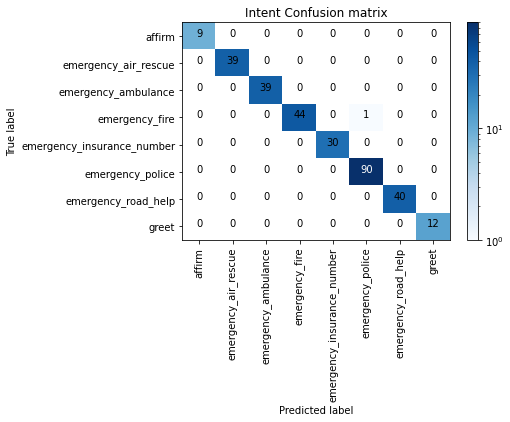

In [19]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu.md", model_directory)

# Bot mais complexos

Nesta parte do notebook iremos abordar como é realizada uma conversação continuada com um bot.

Para treinar um modelo assim, você deve construir os caminhos de conversa que um bot pode percorrer com um usuário.

** Mostrar dataset **

In [ ]:
from IPython.display import Image
from rasa_core.agent import Agent


agent = Agent('domain.yml')
agent.visualize("stories.md", output_file="story_graph.png", max_history=10)
Image(filename="story_graph.png")

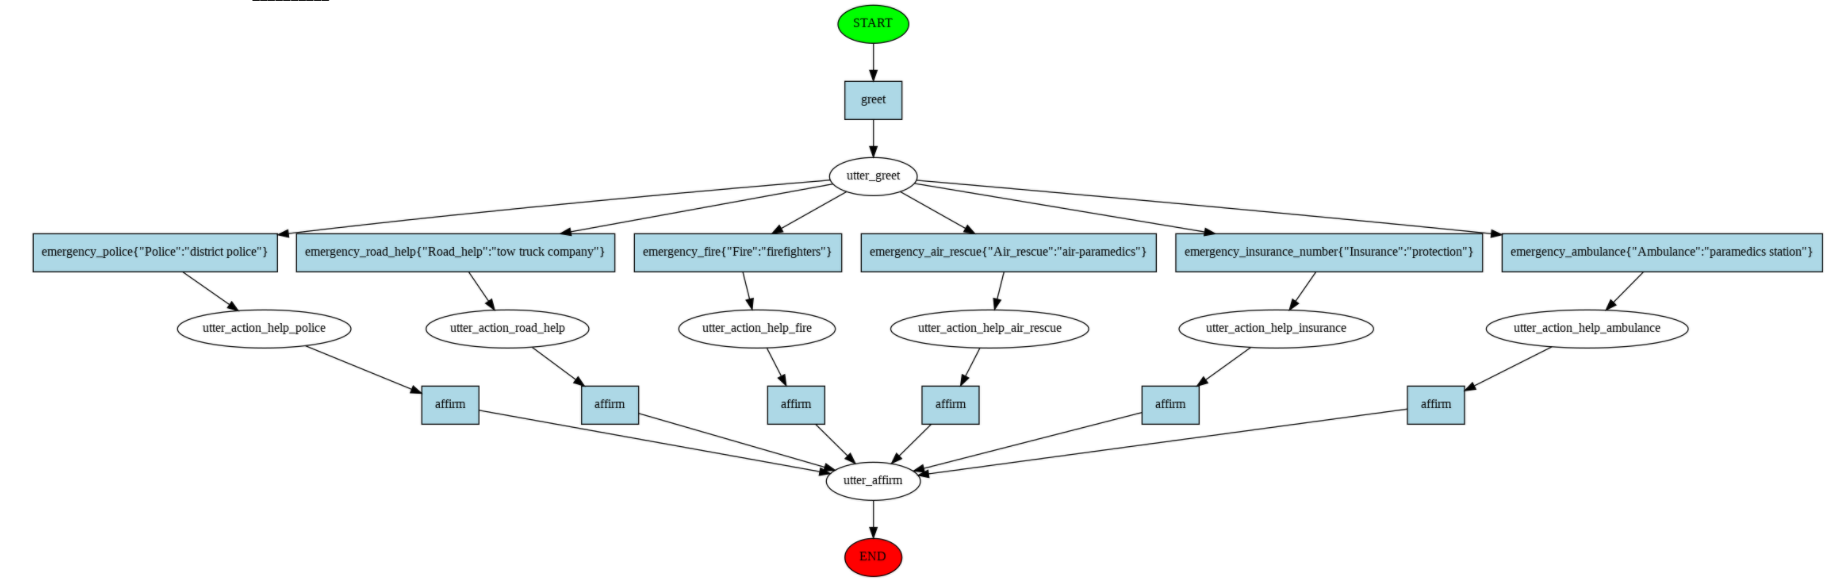

In [20]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.1,
    epochs=50
)

agent.persist('models/dialogue')

Using TensorFlow backend.
Processed trackers: 100%|██████████| 7747/7747 [02:36<00:00, 49.51it/s, # actions=30091]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 154)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                23936     
_________________________________________________________________
dense_1 (Dense)              (None, 11)                363       
_________________________________________________________________
activation_1 (Activation)    (None, 11)                0         
Total params: 24,299
Trainable params: 24,299
Non-trainable params: 0
_________________________________________________________________
Train on 27081 samples, validate on 3010 samples
Epoch 1/50
27081/27081 [==============================] - 19s 697us/step - loss: 0.4831 - acc: 0.8547 - val_loss: 0.0204 - val_acc: 0.9980
Epoch 2/50
27081/27081 [==============================] - 18s 655us/step - loss: 0

In [21]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

/usr/local/lib/python3.6/dist-packages/rasa_nlu/extractors/entity_synonyms.py:85: UserWarning: Failed to load synonyms file from '/content/drive/My Drive/Turing/NLU/./models/nlu/default/current/entity_synonyms.json'
  "".format(entity_synonyms_file))


In [ ]:
print("Your bot is ready to talk! Start to say 'hello' or say 'stop' to finish or restart your dialogue")
print()
while True:
    a = input()
    if a == 'stop':
        break
    else:
        responses = agent.handle_message(a)
        for response in responses:
            print("BOT:", response["text"])

Your bot is ready to talk! Start to say 'hello' or say 'stop' to finish or restart your dialogue

Hi
BOT: Hello, I can offer you assistance on emergency situations, what number are you looking for?
My house is on fire, i need help!
BOT: The number to call for any type of emergency in Europe is: 112. Depending of your country you can call the following numbers: Austria - 122 Belgium - 100 Bulgaria - 160 Croatia - 193 Cyprus - 199 Czeckia - 150 Denmark - 112 Estonia - 112 Finland - 112 France - 18 Germany - 110 Greece - 199 Hungary - 105 Ireland - 112 or 999 Italy - 115 Latvia - 112 Lithuania - 112 Luxembourg - 112 Malta - 112 Netherlands - 112 Poland - 998 Portugal - 112 Romania - 112 Slovakia - 150 Slovenia - 112 Spain - 080 Sweden - 112 Switzerland - 118 Unit Kingdom - 112
ok
BOT: You're welcome
Hello
BOT: Hello, I can offer you assistance on emergency situations, what number are you looking for?
My car was stolen, I have to call my insurance Company, please
BOT: -the customer service